In [3]:
#EDA = Exploratory Data Analysis

In [4]:
!pip install seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [106]:
import numpy as np
import pandas as pd

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#computer vision library
import cv2

#glob
from glob import glob

In [107]:
#extract male and female in crop_data and put to list
fpath = glob('./crop_data/female/*.jpg')
mpath = glob('./crop_data/male/*.jpg')

In [108]:
df_female = pd.DataFrame(fpath, columns=['filepath'])
df_female['gender'] = 'female'

df_male = pd.DataFrame(mpath, columns=['filepath'])
df_male['gender'] = 'male'

df = pd.concat((df_female, df_male),axis=0)

df.head()

,filepath,gender
0,./crop_data/female\female_0.jpg,female
1,./crop_data/female\female_1.jpg,female
2,./crop_data/female\female_10.jpg,female
3,./crop_data/female\female_11.jpg,female
4,./crop_data/female\female_12.jpg,female


In [109]:
df.tail()

,filepath,gender
48,./crop_data/male\male_52.jpg,male
49,./crop_data/male\male_6.jpg,male
50,./crop_data/male\male_7.jpg,male
51,./crop_data/male\male_8.jpg,male
52,./crop_data/male\male_9.jpg,male


In [110]:
df.shape

(105, 2)

In [111]:
#it will take each image path then return width of the image
def get_size(path):
    img = cv2.imread(path)
    return img.shape[0]

In [112]:
df['dimension'] = df['filepath'].apply(get_size) #store dimension of image in this columns

In [113]:
df.head()

,filepath,gender,dimension
0,./crop_data/female\female_0.jpg,female,2639
1,./crop_data/female\female_1.jpg,female,252
2,./crop_data/female\female_10.jpg,female,157
3,./crop_data/female\female_11.jpg,female,403
4,./crop_data/female\female_12.jpg,female,252


In [114]:
dist_gender = df['gender'].value_counts()
dist_gender

gender
male      53
female    52
Name: count, dtype: int64

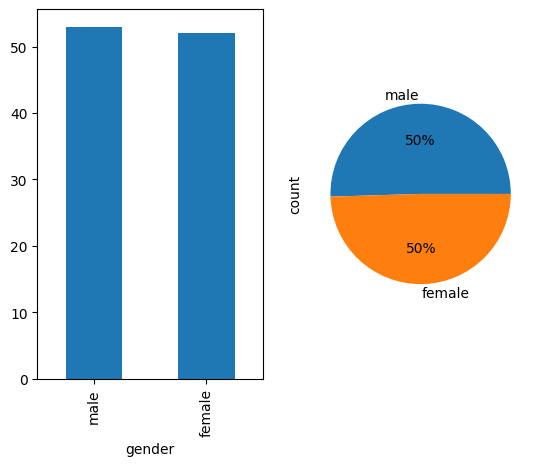

In [115]:
fig,ax = plt.subplots(nrows=1, ncols=2)
dist_gender.plot(kind = 'bar', ax =ax[0])
dist_gender.plot(kind = 'pie', ax =ax[1], autopct='%0.0f%%')
plt.show()

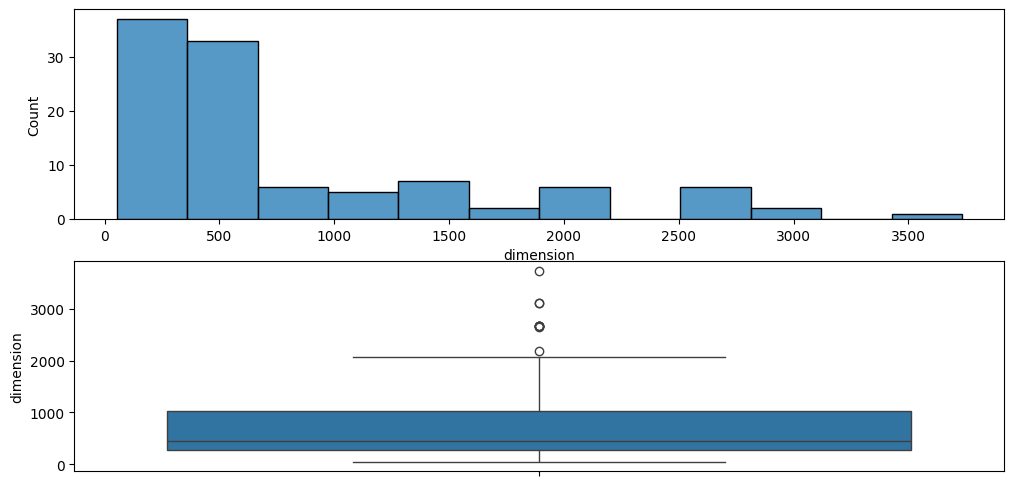

In [116]:
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
sns.histplot(df['dimension'])
plt.subplot(2,1,2)
sns.boxplot(df['dimension'])
plt.show()

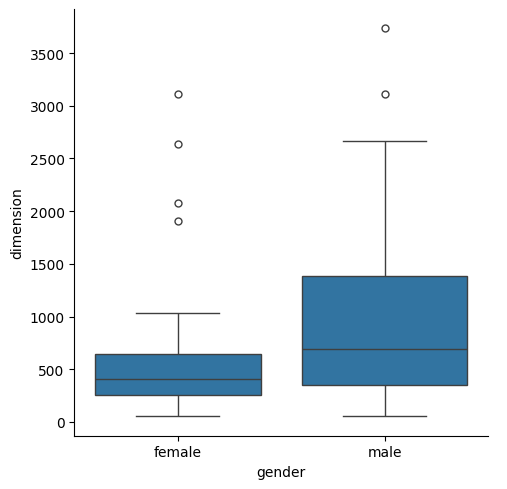

In [117]:
sns.catplot(data=df, x='gender', y ='dimension', kind = 'box')

In [30]:
#đa số có dimension hơn 200, đa số nữ có ảnh nét hơn nam
#chỉnh tất cả ảnh về 300 x 300

In [118]:
df_filter = df.query('dimension > 250')

In [119]:
df_filter.shape

(90, 3)

In [120]:
df_filter['gender'].value_counts(normalize=True)

gender
female    0.511111
male      0.488889
Name: proportion, dtype: float64

In [121]:
def structuring(path):
    try:
        # step 1: read image
        img = cv2.imread(path)  # BGR
        if img is None:
            return None

        # step 2: convert into grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # step 3: resize into 300x300
        size = gray.shape[0]
        if size >= 100:
            # shrink
            gray_resize = cv2.resize(gray, (300, 300), cv2.INTER_AREA)
        else:
            # enlarge
            gray_resize = cv2.resize(gray, (300, 300), cv2.INTER_CUBIC)

        # step 4: flatten image
        flatten_image = gray_resize.flatten()
        return flatten_image

    except Exception as e:
        # print(e)  # optional debug
        return None

In [122]:
df_filter.loc[:, 'data'] = df_filter['filepath'].apply(structuring)


C:\Users\Dell\AppData\Local\Temp\ipykernel_3524\2082649009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter.loc[:, 'data'] = df_filter['filepath'].apply(structuring)


In [123]:
df_filter.head()

,filepath,gender,dimension,data
0,./crop_data/female\female_0.jpg,female,2639,"[25, 26, 20, 15, 14, 13, 8, 12, 11, 31, 34, 52..."
1,./crop_data/female\female_1.jpg,female,252,"[13, 16, 23, 29, 27, 19, 22, 28, 48, 53, 42, 3..."
3,./crop_data/female\female_11.jpg,female,403,"[193, 192, 192, 192, 192, 193, 191, 193, 190, ..."
4,./crop_data/female\female_12.jpg,female,252,"[61, 60, 59, 59, 59, 59, 60, 60, 59, 57, 55, 5..."
5,./crop_data/female\female_13.jpg,female,354,"[225, 225, 225, 225, 225, 225, 225, 225, 225, ..."


In [124]:
data = df_filter['data'].apply(pd.Series)

In [125]:
data.columns = [f"pixel_{i}" for i in data.columns]

In [126]:
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_89990,pixel_89991,pixel_89992,pixel_89993,pixel_89994,pixel_89995,pixel_89996,pixel_89997,pixel_89998,pixel_89999
0,25,26,20,15,14,13,8,12,11,31,...,17,15,14,12,25,10,13,16,26,19
1,13,16,23,29,27,19,22,28,48,53,...,27,28,26,24,21,20,21,24,25,25
3,193,192,192,192,192,193,191,193,190,191,...,189,188,187,187,187,188,189,189,190,189
4,61,60,59,59,59,59,60,60,59,57,...,55,55,55,55,55,55,55,55,55,55
5,225,225,225,225,225,225,225,225,225,225,...,91,89,86,89,89,75,99,125,108,123


In [127]:
#data normalization 

In [128]:
data = data/255.0

In [129]:
data['gender'] = df_filter['gender']

In [130]:
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_89991,pixel_89992,pixel_89993,pixel_89994,pixel_89995,pixel_89996,pixel_89997,pixel_89998,pixel_89999,gender
0,0.098039,0.101961,0.078431,0.058824,0.054902,0.050980,0.031373,0.047059,0.043137,0.121569,...,0.058824,0.054902,0.047059,0.098039,0.039216,0.050980,0.062745,0.101961,0.074510,female
1,0.050980,0.062745,0.090196,0.113725,0.105882,0.074510,0.086275,0.109804,0.188235,0.207843,...,0.109804,0.101961,0.094118,0.082353,0.078431,0.082353,0.094118,0.098039,0.098039,female
3,0.756863,0.752941,0.752941,0.752941,0.752941,0.756863,0.749020,0.756863,0.745098,0.749020,...,0.737255,0.733333,0.733333,0.733333,0.737255,0.741176,0.741176,0.745098,0.741176,female
4,0.239216,0.235294,0.231373,0.231373,0.231373,0.231373,0.235294,0.235294,0.231373,0.223529,...,0.215686,0.215686,0.215686,0.215686,0.215686,0.215686,0.215686,0.215686,0.215686,female
5,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.349020,0.337255,0.349020,0.349020,0.294118,0.388235,0.490196,0.423529,0.482353,female


In [131]:
data.isnull().sum().sum()

np.int64(0)

In [132]:
#remove miss value
data.dropna(inplace=True)

In [133]:
data.shape

(90, 90001)

In [134]:
#save data for future study

In [135]:
import pickle

In [136]:
pickle.dump(data,open('./data/data_images_300_300.pickle', mode = 'wb'))